In [1]:
#Importation of libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Prostate_Cancer.csv')

In [5]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [8]:
#Mapping of results column

df['diagnosis_result'] = df['diagnosis_result'].apply({'M':1, 'B':0}.get)

In [10]:
#Dropping id column

df.drop(columns='id', inplace=True)

In [11]:
#Define our features (X) and labels (Y)
#Define the test and train dataset for features and labels

x= df.drop(columns='diagnosis_result').copy()
y= df['diagnosis_result']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [12]:
#Running KNN for default value of 5
knn = neighbors.KNeighborsClassifier()

#Fit the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
#Calculate the accuracy of the model on the test dataset
knn.score(x_test, y_test)

0.84

In [14]:
#Try KNN for different K values from 1 to 20

no_neighbors = range(1,15)

training_accuracy = []
test_accuracy = []

for n in no_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

[]

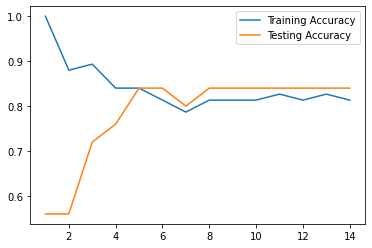

In [15]:
plt.plot(no_neighbors, training_accuracy, label='Training Accuracy')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.plot()

In [17]:
#Highest train accuracy shown in graph is at no_neighbors= 5
training_accuracy[4]

0.84

In [18]:
#Highest test accuracy shown in graph is at no_neighbors= 5
test_accuracy[5]

0.84